In [19]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, QuantumRegister, ClassicalRegister
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-05 11:57:06,888: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
simulator = QasmSimulator()

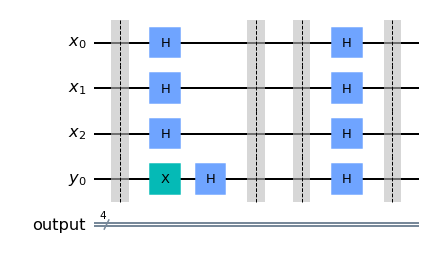

In [28]:
x = QuantumRegister(3,'x')
y = QuantumRegister(1,'y')
output = ClassicalRegister(4,'output')
circuit_balanced_h = QuantumCircuit(x,y,output)
circuit_balanced_h.barrier()
circuit_balanced_h.x(3)
circuit_balanced_h.h(0)
circuit_balanced_h.h(1)
circuit_balanced_h.h(2)
circuit_balanced_h.h(3)
circuit_balanced_h.barrier()
# circuit_balanced_h.x(0)
# circuit_balanced_h.x(2)
# circuit_balanced_h.cx(0,3)
# circuit_balanced_h.cx(1,3)
# circuit_balanced_h.cx(2,3)
# circuit_balanced_h.x(0)
# circuit_balanced_h.x(2)
circuit_balanced_h.barrier()
circuit_balanced_h.h(0)
circuit_balanced_h.h(1)
circuit_balanced_h.h(2)
circuit_balanced_h.h(3)
circuit_balanced_h.barrier()
circuit_balanced_h.draw()

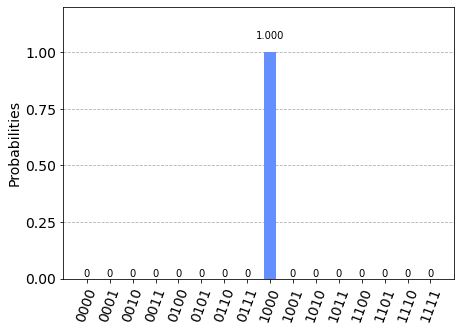

In [29]:
zero = qi.Statevector.from_label('0000')
sv = zero.evolve(circuit_balanced_h)
probs = sv.probabilities_dict()
plot_histogram(probs)


In [30]:
circuit_balanced_h.measure(0, 0)
circuit_balanced_h.measure(1, 1)
circuit_balanced_h.measure(2, 2)
circuit_balanced_h.measure(3, 3)

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4  and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [31]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(circuit_balanced_h, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


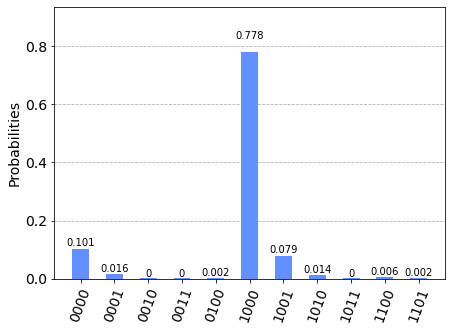

In [32]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)